# ***-OVERSAMPLING-***

# **🔹 Apa itu Oversampling?**

Oversampling adalah salah satu teknik penanganan data imbalanced (tidak seimbang) di machine learning, khususnya classification.

Data imbalanced = jumlah sampel antar kelas berbeda jauh (misalnya 90% kelas A, 10% kelas B).

Hal ini bikin model cenderung bias ke kelas mayoritas.

*👉 Oversampling bekerja dengan menambah jumlah data pada kelas minoritas supaya distribusi data jadi lebih seimbang.*

In [ ]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 49.8 MB/s eta 0:00:00


install library berikut jika import data menggunakan mySQL

In [10]:
pip install imbalanced-learn

install libary untuk imbalance learn

Saving iris (1).csv to iris (1) (1).csv
explained variance ratio (first two components): [0.89930109 0.06290301]


Text(0.5, 1.0, 'PCA of IRIS dataset')

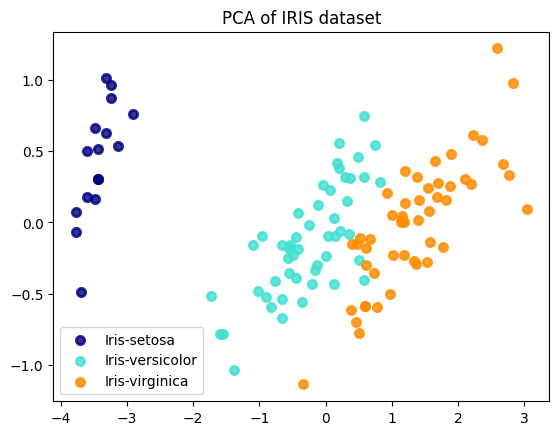

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Upload file CSV di Colab
from google.colab import files
uploaded = files.upload()  # pilih file iris.csv

# 2. Baca CSV
df = pd.read_csv("iris (1).csv")

# Kalau kolom masih "COL 1", ubah jadi rapi
if "COL 1" in df.columns:
    df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]

# 3. Pisahkan fitur & label
X = df.drop("Species", axis=1).values
y = df["Species"].astype("category").cat.codes.values
target_names = df["Species"].unique()

# 4. PCA (2 komponen)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# 5. LDA (2 komponen)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

print("explained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

# 6. Visualisasi PCA
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")




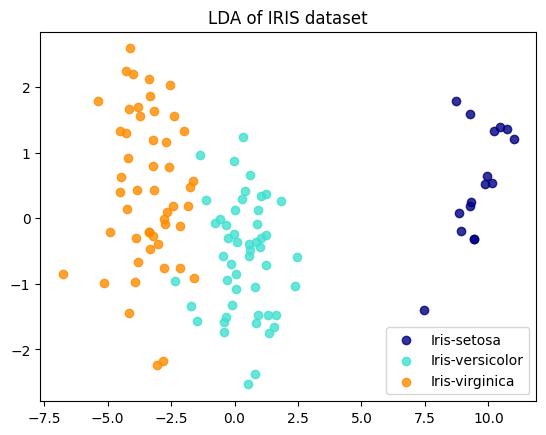

In [ ]:
# 7. Visualisasi LDA
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1],
                alpha=0.8, color=color, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

berikut PCA dan LDA 35 data yang sudah dihapus

Saving iris (1).csv to iris (1).csv
Distribusi kelas sebelum balancing:
Species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        16
Name: count, dtype: int64

Distribusi kelas setelah balancing:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


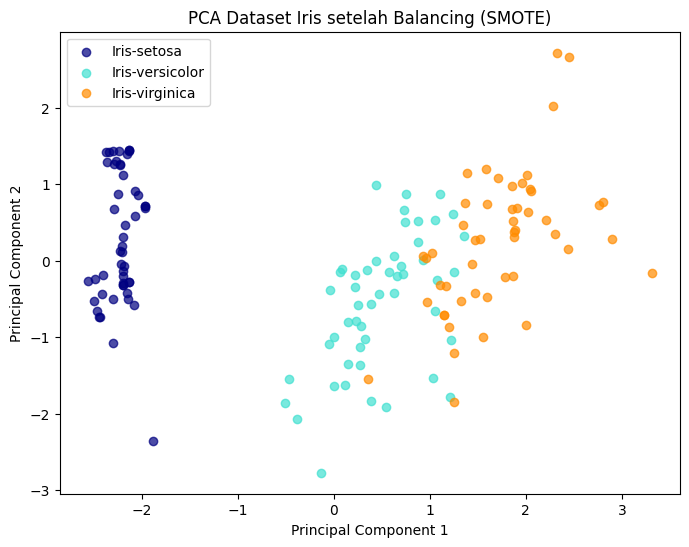

In [4]:
# 1. Upload CSV
from google.colab import files
uploaded = files.upload()

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Rename biar rapi
if "iris (1).csv" in uploaded:
    os.rename("iris (1).csv", "iris (1).csv")

# 2. Baca CSV
df = pd.read_csv("iris (1).csv")

# Kalau masih pakai "COL 1", "COL 2", ubah nama
if "COL 1" in df.columns:
    df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]

print("Distribusi kelas sebelum balancing:")
print(df["Species"].value_counts())

# 3. Pisahkan fitur & label
X = df.drop("Species", axis=1).astype(float).values
y = df["Species"]

# 4. Balancing dengan SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("\nDistribusi kelas setelah balancing:")
print(pd.Series(y_res).value_counts())

# 5. Standardisasi sebelum PCA
X_scaled = StandardScaler().fit_transform(X_res)

# 6. PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Species"] = y_res

# 7. Visualisasi PCA hasil balancing
plt.figure(figsize=(8,6))
colors = ["navy", "turquoise", "darkorange"]

for color, species in zip(colors, df_pca["Species"].unique()):
    subset = df_pca[df_pca["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], color=color, alpha=0.7, label=species)

plt.title("PCA Dataset Iris setelah Balancing (SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Berikut PCA data yang sudah diseimbangkan

# **KLASIFIKASI DENGAN METODE SVM DAN NAIVE BAYES**

**KLASIFIKASI SEBELUM DI SMOTE**



*   **SVM**



Saving iris (1).csv to iris (1).csv
Distribusi kelas asli:
Species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        16
Name: count, dtype: int64

=== Klasifikasi SEBELUM SMOTE ===

SVM:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.94        35
      macro avg       0.96      0.96      0.96        35
   weighted avg       0.95      0.94      0.94        35



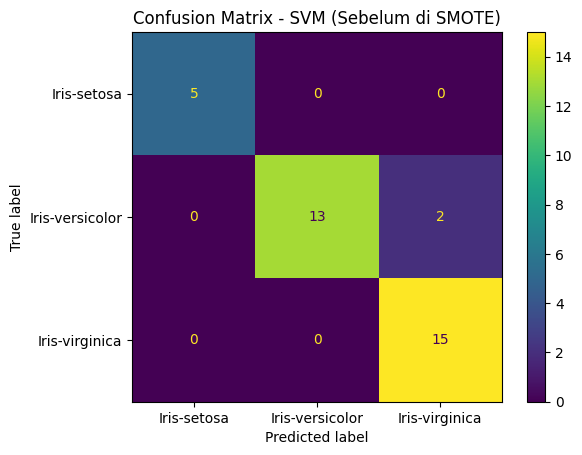

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Upload & baca dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("iris (1).csv")
if "COL 1" in df.columns:
    df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]

print("Distribusi kelas asli:")
print(df["Species"].value_counts())

# Pisahkan fitur & label
X = df.drop("Species", axis=1).astype(float)
y = df["Species"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Klasifikasi SEBELUM SMOTE ===")


# SVM
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("\nSVM:\n", classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("Confusion Matrix - SVM (Sebelum di SMOTE)")
plt.show()




*   **NAIVE BAYES**




Naive Bayes:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



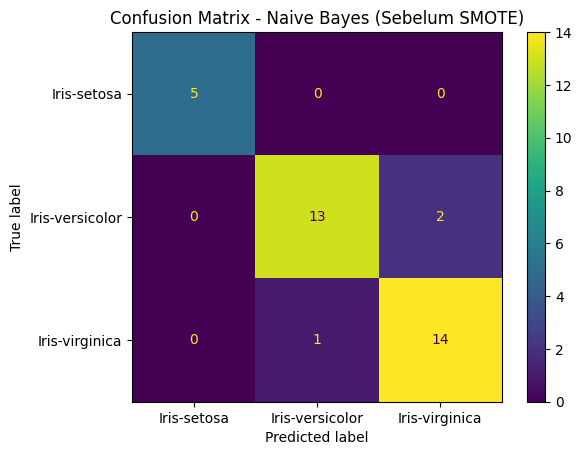

In [3]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Confusion Matrix - Naive Bayes (Sebelum SMOTE)")
plt.show()

**KLASIFIKASI SESUDAH DI SMOTE**



*   **SVM**




Distribusi kelas sebelum SMOTE (train set): Counter({'Iris-virginica': 35, 'Iris-versicolor': 35, 'Iris-setosa': 11})
Distribusi kelas sesudah SMOTE (train set): Counter({'Iris-virginica': 35, 'Iris-versicolor': 35, 'Iris-setosa': 35})

=== Klasifikasi SESUDAH SMOTE ===

SVM + SMOTE:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.94        35
      macro avg       0.96      0.96      0.96        35
   weighted avg       0.95      0.94      0.94        35



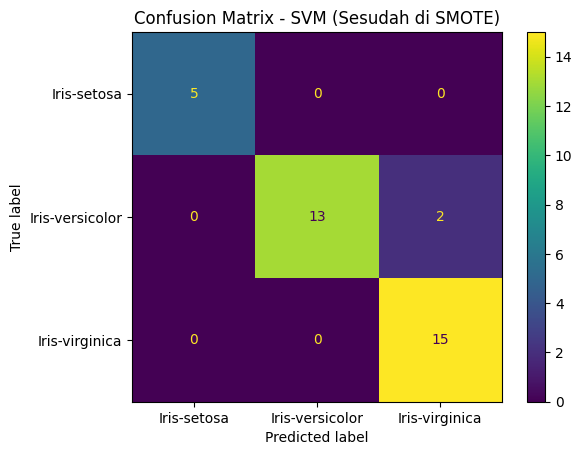

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("\nDistribusi kelas sebelum SMOTE (train set):", Counter(y_train))

# Terapkan SMOTE hanya pada data train
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

print("Distribusi kelas sesudah SMOTE (train set):", Counter(y_res))
print("\n=== Klasifikasi SESUDAH SMOTE ===")

# SVM + SMOTE
svm_sm = SVC(kernel="linear", random_state=42)
svm_sm.fit(X_res, y_res)
y_pred_svm_sm = svm_sm.predict(X_test_scaled)
print("\nSVM + SMOTE:\n", classification_report(y_test, y_pred_svm_sm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_sm)
plt.title("Confusion Matrix - SVM (Sesudah di SMOTE)")
plt.show()




*   **NAIVE BAYES**



Naive Bayes + SMOTE:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



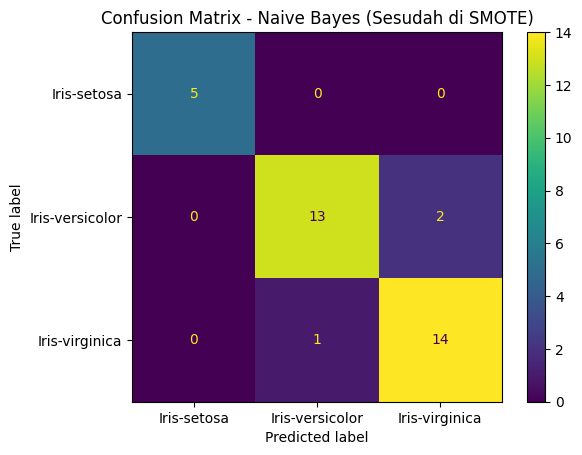

In [5]:
# Naive Bayes + SMOTE
nb_sm = GaussianNB()
nb_sm.fit(X_res, y_res)
y_pred_nb_sm = nb_sm.predict(X_test_scaled)
print("\nNaive Bayes + SMOTE:\n", classification_report(y_test, y_pred_nb_sm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb_sm)
plt.title("Confusion Matrix - Naive Bayes (Sesudah di SMOTE)")
plt.show()

# **🔹 Kesimpulan Oversampling**

1. Oversampling adalah metode untuk menangani data imbalanced dengan cara menambah jumlah data pada kelas minoritas agar distribusi antar kelas lebih seimbang.

2. Teknik ini membuat model machine learning tidak bias terhadap kelas mayoritas, sehingga performa klasifikasi meningkat terutama pada kelas minoritas.

3. Ada beberapa metode:

Random Oversampling → menduplikasi data minoritas.

*   SMOTE (Synthetic Minority Oversampling Technique) → membuat data sintetis baru dari kombinasi data minoritas.
*   ADASYN → fokus membuat data sintetis di area sulit (dekat dengan mayoritas).
*   Kelebihan: sederhana, efektif, tidak mengurangi data mayoritas.
*   Kekurangan: bisa menimbulkan overfitting (Random Oversampling), atau noise (SMOTE/ADASYN) jika tidak dikontrol dengan baik.



**👉 Kesimpulan utama:**

Oversampling adalah solusi efektif untuk mengatasi ketidakseimbangan kelas dalam dataset, sehingga model dapat belajar secara lebih adil dan akurat terhadap semua kelas. Namun, pemilihan metode oversampling harus disesuaikan dengan karakteristik data agar tidak menimbulkan masalah baru.